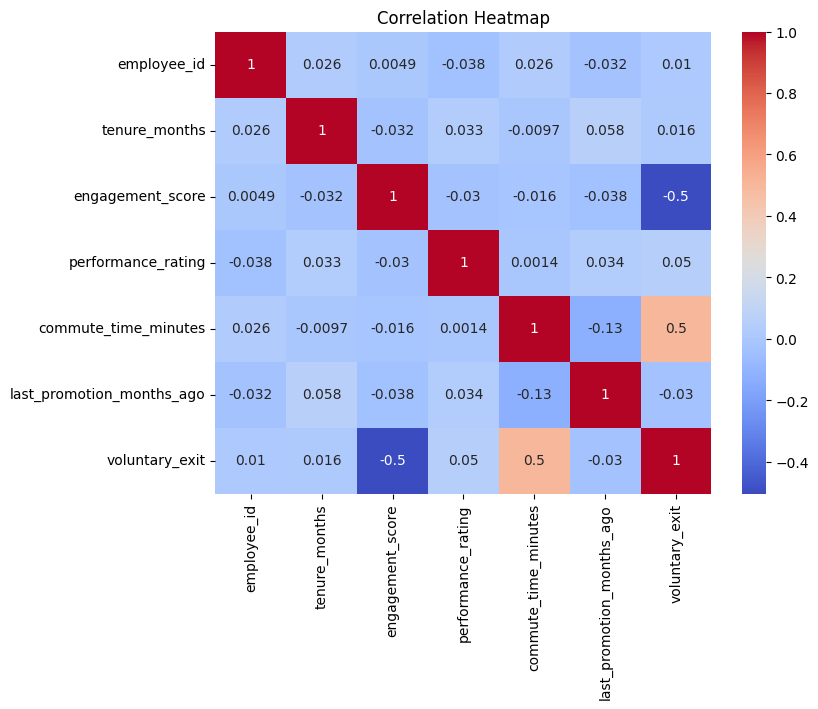

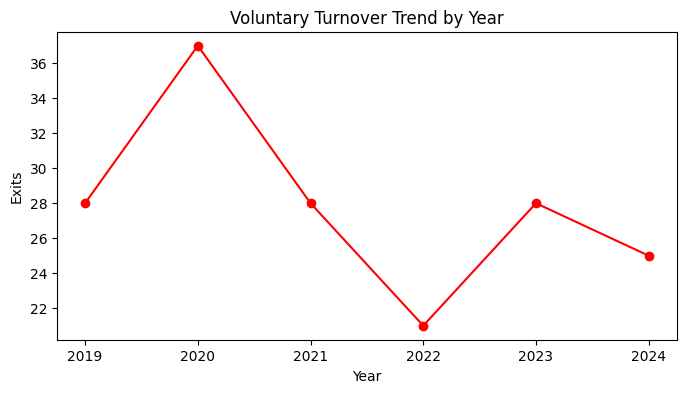

R² Score (Commute Time → Voluntary Exit): 0.24


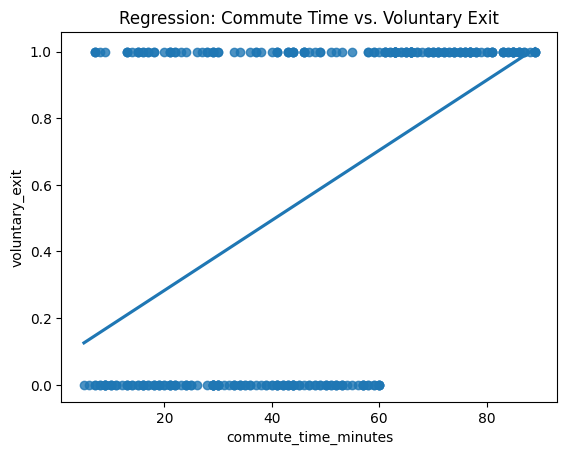

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Create Fake HR Data
np.random.seed(42)
num_records = 300

data = pd.DataFrame({
    "employee_id": np.arange(1, num_records + 1),
    "tenure_months": np.random.randint(1, 72, size=num_records),
    "engagement_score": np.round(np.random.normal(3.5, 1.0, size=num_records), 2),
    "performance_rating": np.random.randint(1, 6, size=num_records),
    "commute_time_minutes": np.random.randint(5, 90, size=num_records),
    "last_promotion_months_ago": np.random.randint(0, 60, size=num_records),
})

# Label voluntary exits
data["voluntary_exit"] = (
    (data["engagement_score"] < 3) | (data["commute_time_minutes"] > 60)
).astype(int)

# Step 2: Correlation Heatmap
plt.figure(figsize=(8, 6))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Step 3: Trend Visualization (Simulated Exit Year)
data["exit_year"] = np.where(data["voluntary_exit"] == 1, np.random.choice(
    [2019, 2020, 2021, 2022, 2023, 2024], size=num_records), np.nan)
turnover_trend = data["exit_year"].value_counts().sort_index()

plt.figure(figsize=(8, 4))
turnover_trend.plot(kind="line", marker="o", color="red")
plt.title("Voluntary Turnover Trend by Year")
plt.xlabel("Year")
plt.ylabel("Exits")
plt.show()

# Step 4: Simple Regression
X = data[["commute_time_minutes"]]
y = data["voluntary_exit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R² Score (Commute Time → Voluntary Exit): {r2:.2f}")

# Plot regression
sns.regplot(x="commute_time_minutes", y="voluntary_exit", data=data, logistic=False, ci=None)
plt.title("Regression: Commute Time vs. Voluntary Exit")
plt.show()


In [3]:
data["exit_year"].dtype

dtype('float64')

In [4]:
# Save the fake HR dataset as a CSV file
data.to_csv("fake_hr_turnover_data.csv", index=False)


In [5]:
# Select numerical columns for correlation
corr_data = data[[
    "tenure_months",
    "engagement_score",
    "performance_rating",
    "commute_time_minutes",
    "last_promotion_months_ago",
    "voluntary_exit"
]]

# Calculate correlation matrix
correlation_matrix = corr_data.corr()
print(correlation_matrix)


                           tenure_months  engagement_score  \
tenure_months                   1.000000         -0.032310   
engagement_score               -0.032310          1.000000   
performance_rating              0.032688         -0.030439   
commute_time_minutes           -0.009749         -0.015869   
last_promotion_months_ago       0.057872         -0.037991   
voluntary_exit                  0.016037         -0.503405   

                           performance_rating  commute_time_minutes  \
tenure_months                        0.032688             -0.009749   
engagement_score                    -0.030439             -0.015869   
performance_rating                   1.000000              0.001382   
commute_time_minutes                 0.001382              1.000000   
last_promotion_months_ago            0.034295             -0.126766   
voluntary_exit                       0.049880              0.503445   

                           last_promotion_months_ago  voluntary_exi

In [7]:
# Reset index to turn the row names into a column
correlation_matrix_reset = correlation_matrix.reset_index()

# Rename the first column from "index" to something meaningful like "Variable"
correlation_matrix_reset.rename(columns={"index": "Variable"}, inplace=True)

# Save as clean CSV
correlation_matrix_reset.to_csv("correlation_matrix.csv", index=False)
